In [1]:
using LinearAlgebra
using Random
using Printf
using JLD
using TensorOperations
using Base.Iterators
using Random
using SpecialFunctions: erfc
include("hamiltonian.jl")
include("qi_tools.jl")
include("thermalize_with_alg.jl")

function showall(io, x, limit = false) 
    println(io, summary(x), ":")
    Base.print_matrix(IOContext(io, :limit => limit), x)
end
  

showall (generic function with 2 methods)

In [5]:
f(t, eta) = 1 + (abs(t) <= eta) * 1im
eta = 0.3
times = [-0.5:0.1:0.5;]
f.(times, eta)

11-element Vector{Complex{Int64}}:
 1 + 0im
 1 + 0im
 1 + 1im
 1 + 1im
 1 + 1im
 1 + 1im
 1 + 1im
 1 + 1im
 1 + 1im
 1 + 0im
 1 + 0im

In [51]:

dim = 2^2
random_eigvals = rand(dim)
random_matrix = Diagonal(rand(dim, dim))
id = I(dim)
norm(sin.(random_matrix) * cos.(2 * random_matrix) * id - id * cos.(2 * random_matrix) * sin.(random_matrix))
# norm(sin(random_matrix) * cos(2 * random_matrix) * id - id * cos(2 * random_matrix) * sin(random_matrix))
# norm(sin(2 * random_matrix) - sin.(2 * random_matrix))
println(norm(cos(random_matrix) - cos.(random_matrix)))
display(cos(random_matrix))
display(cos.(random_matrix))


4×4 Diagonal{Float64, Vector{Float64}}:
 0.794439   ⋅         ⋅         ⋅ 
  ⋅        0.892163   ⋅         ⋅ 
  ⋅         ⋅        0.910135   ⋅ 
  ⋅         ⋅         ⋅        0.992077

4×4 Matrix{Float64}:
 0.794439  1.0       1.0       1.0
 1.0       0.892163  1.0       1.0
 1.0       1.0       0.910135  1.0
 1.0       1.0       1.0       0.992077

3.4641016151377544


In [17]:
dim = 2^30
random_eigvals = @time rand(dim)
U(t) = Diagonal(exp.(1im * t * random_matrix))
U_t = @time U(1.0)
U_minus2t = @time U(-2.0)
U_minus2t_from_1t = @time U_t^(-2.0)
@printf("really")

  3.397559 seconds (2 allocations: 8.000 GiB, 11.62% gc time)
  0.000228 seconds (5 allocations: 32.562 KiB)
  0.000029 seconds (5 allocations: 32.562 KiB)
  0.127051 seconds (134.30 k allocations: 9.009 MiB, 99.86% compilation time)
really

In [13]:
A = Matrix{ComplexF64}([1 2 3 4 5 6 7 8])
display(A)
eta = 3
indices = findall(x -> abs(x) <= eta, A)

A[indices] .+= (0.0 + 1.0im) ./ A[indices]
display(A)

1×8 Matrix{ComplexF64}:
 1.0+0.0im  2.0+0.0im  3.0+0.0im  …  6.0+0.0im  7.0+0.0im  8.0+0.0im

1×8 Matrix{ComplexF64}:
 1.0+1.0im  2.0+0.5im  3.0+0.333333im  …  6.0+0.0im  7.0+0.0im  8.0+0.0im

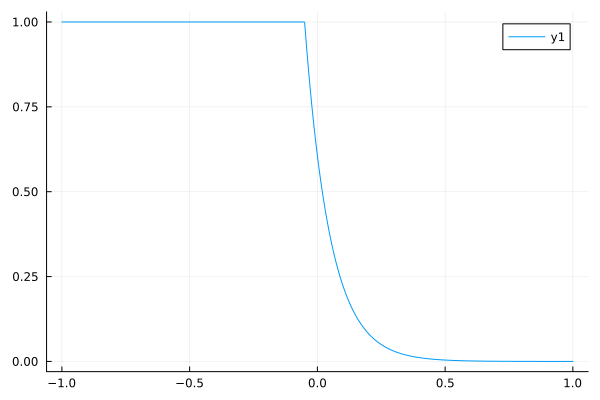

In [16]:
w0 = 0.1
N = 2^10
beta = 10.
transition_metro(w) = exp(-beta * max(w + 1/(2 * beta), 0.0))
energies = range(-1.0, 1.0, N)
plot(energies, transition_metro.(energies))

In [2]:
index1 = (1, 2)
index2 = [[1], [2]]
index3 = [[1, 1, 2, 2], [1, 2, 1, 2]]
values = [1, 2, 3, 4]
A = spzeros(2, 2)
B = spzeros(2, 2)
Random.seed!(666)
# indices = CartesianIndex.(index3[1], index3[2])
# C[indices] .= values
C::SparseMatrixCSC{Float64} = spzeros(2, 2)
dim = size(C, 1)
diag_indices = CartesianIndex.(1:dim, 1:dim)

display(diag_indices)
D = [10 1; 1 9]
C[diag_indices] .= D[diag_indices]
display(C)

display([CartesianIndex(1, 2)])

# display(C)
# # A[index1...] = 1
# # B[index2[1], index2[2]] .= 1
# # C[index3[1], index3[2]] .= values
# # display(A)
# # display(B)
# # display(C)
# bohr_dict = Dict{Float64, Vector{CartesianIndex}}()
# bohr_dict[0.0] = CartesianIndex.(collect(1:4), collect(1:4)) 
# CartesianIndex(1, 2)

2-element Vector{CartesianIndex{2}}:
 CartesianIndex(1, 1)
 CartesianIndex(2, 2)

2×2 SparseMatrixCSC{Float64, Int64} with 2 stored entries:
 10.0   ⋅ 
   ⋅   9.0

1-element Vector{CartesianIndex{2}}:
 CartesianIndex(1, 2)

In [4]:
using SparseArrays

# Example sparse matrix
n = 5
sparse_matrix = spzeros(n, n)

# Indices and values to set
rows = [1, 2, 3]  # Row indices
cols = [2, 3, 4]  # Column indices
values = [10.0, 20.0, 30.0]  # Values to set

# Assign values
sparse_matrix[rows, cols] .= values

display(sparse_matrix)

5×5 SparseMatrixCSC{Float64, Int64} with 9 stored entries:
  ⋅   10.0  10.0  10.0   ⋅ 
  ⋅   20.0  20.0  20.0   ⋅ 
  ⋅   30.0  30.0  30.0   ⋅ 
  ⋅     ⋅     ⋅     ⋅    ⋅ 
  ⋅     ⋅     ⋅     ⋅    ⋅ 

In [2]:
random_dict = Dict()
random_dict["nradn0"] = 0
random_dict["nrand1"] = 1
random_dict["nrand2"] = 2
random_dict["nrand3"] = 3

for k in keys(random_dict)
    println(k)
end

nradn0
nrand2
nrand1
nrand3


In [ ]:
A = [1 2; 3 4]
diag_vals = 
B = spzeros(2,2)
B .= spdiagm(0 => diag(A))

2×2 SparseMatrixCSC{Float64, Int64} with 2 stored entries:
 1.0   ⋅ 
  ⋅   4.0

In [6]:
beta = 2.0
alpha(nu_1, nu_2) = exp(-beta^2 * (nu_1 + nu_2 + 2/beta)^2 / 16) * exp(-beta^2 * (nu_1 - nu_2)^2 / 8)

for _ in 1:100000
    nu_1 = 0.9 * rand() - 0.45
    nu_2 = 0.9 * rand() - 0.45  
    alpha_val = alpha(nu_1, nu_2)
    alpha_skew_val = alpha(-nu_2, -nu_1) * exp(-beta * (nu_1 + nu_2) / 2)
    if norm(alpha_val - alpha_skew_val) > 1e-14
        println(alpha_val)
        println(alpha_skew_val, "\n")
    else
        # @printf("Good for nu_1 = %f, nu_2 = %f\n", nu_1, nu_2)
    end
end

In [72]:
num_qubits = 10
ham_filename(n) = @sprintf("/Users/bence/code/liouvillian_metro/julia/data/hamiltonian_n%d.jld", n)
hamiltonian = load(ham_filename(num_qubits))["ideal_ham"]
bohr_freqs = hamiltonian.eigvals .- transpose(hamiltonian.eigvals)
# bohr_freqs_plus = - (hamiltonian.eigvals .+ transpose(hamiltonian.eigvals))
# bohr_freq_23_plus = bohr_freqs_plus[2, 3] .+ 2 * hamiltonian.eigvals

# bohr_freq_23_plus[5] == - (hamiltonian.eigvals[2] + hamiltonian.eigvals[3]) + 2 * hamiltonian.eigvals[5]

# bohr_freqs_plus[2, 3] == - (hamiltonian.eigvals[2] + hamiltonian.eigvals[3])
# iterate over all entries of bohr freqs
@time begin
    for j in 1:2^num_qubits
        for i in 1:2^num_qubits
            madonna = exp(1im * bohr_freqs[i, j]) - sqrt(1 - abs(exp(1im * bohr_freqs[i, j]))^2)
        end
    end
end

  0.532505 seconds (13.64 M allocations: 304.125 MiB, 1.50% gc time)


In [8]:
eigvals = 1im .* [1.0, 2.0, 3.0]
trotter_time_evolution = Diagonal(eigvals.^3)
or = Diagonal(eigvals .* 3)
norm(trotter_time_evolution - or)


38.8329756778952

In [4]:
zero = [1, 0]
one = [0, 1]
oneone = kron(one, one')
zerozero = kron(zero, zero')

phase_gate(phi) = [1 0; 0 exp(1im * phi)]
cp_gate(phi) = kron(oneone, phase_gate(phi)) + kron(zerozero, I(2))

rygate(theta) = [cos(theta/2) -sin(theta/2); sin(theta/2) cos(theta/2)]
crygate(theta) = kron(zerozero, rygate(theta)) + kron(oneone, I(2))

# display(kron(oneone, phase_gate(0.1)) + kron(zerozero, I(2)))
# display(cp_gate(0.1))

# commutation
function commutator(A, B)
    return A * B - B * A
end

phi = 0.1
theta = 0.2
@printf("Commutator norm no control %s, \n", norm(commutator(phase_gate(phi), rygate(theta))))
@printf("Commutator norm with control %s, \n", norm(commutator(cp_gate(phi), crygate(theta))))

Commutator norm no control 0.014112695174805954, 
Commutator norm with control 0.0, 


In [1]:
2 * im == 2im

true

In [5]:
M = [1 2 3; 4 5 6; 7 8 9]
display(M)
display(vec(M))
display(reshape(vec(M), 3, 3))

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

9-element Vector{Int64}:
 1
 4
 7
 2
 5
 8
 3
 6
 9

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [37]:
function compute_b1(time_labels::Vector{Float64})
    f1(t) = 1 / cosh(2 * pi * t)
    f2(t) = sin(-t) * exp(-2 * t^2)
    return 2 * sqrt(pi) * exp(1/8) * convolute.(Ref(f1), Ref(f2), time_labels)
end

function compute_b2(time_labels::Vector{Float64})
    return exp.(-4*time_labels.^2 .- 2*im*time_labels) / sqrt(4*pi^3)
end

num_energy_bits = 10
N = 2^(num_energy_bits)
N_labels = [0:1:Int(N/2)-1; -Int(N/2):1:-1]
w0 = 0.01
t0 = 2 * pi / (N * hamiltonian.w0)
time_labels = t0 * N_labels

b2 = Vector{ComplexF64}(compute_b2(time_labels))
b2_negative = Vector{ComplexF64}(compute_b2(-time_labels))
atol = 1e-14
truncated_indices_b2 = findall(x -> abs(real(x)) >= atol || abs(imag(x)) >= atol, b2)
truncated_indices_b2_negative = findall(x -> abs(real(x)) >= atol || abs(imag(x)) >= atol, b2_negative)
b2_truncated_times = time_labels[truncated_indices_b2]
b2_truncated_vals = b2[truncated_indices_b2]
b2_negative_truncated_times = time_labels[truncated_indices_b2_negative]
b2_negative_truncated_vals = b2_negative[truncated_indices_b2_negative]

conj.(b2) == b2_negative
conj.(b2_truncated_vals) == b2_negative_truncated_vals

# For b1
b1 = Vector{ComplexF64}(compute_b1(time_labels))
b1_negative = Vector{ComplexF64}(compute_b1(time_labels))
truncated_indices_b1 = findall(x -> abs(real(x)) >= atol || abs(imag(x)) >= atol, b1)
truncated_indices_b1_negative = findall(x -> abs(real(x)) >= atol || abs(imag(x)) >= atol, b1_negative)
b1_truncated_times = time_labels[truncated_indices_b1]
b1_truncated_vals = b1[truncated_indices_b1]
b1_negative_truncated_times = time_labels[truncated_indices_b1_negative]
b1_negative_truncated_vals = b1_negative[truncated_indices_b1_negative]

conj.(b1) == b1_negative
# conj.(b1_truncated_vals) == b1_negative_truncated_vals

# b::Vector{ComplexF64} = []
# indices_b = findall(x -> abs(real(x)) > atol || abs(imag(x)) > atol, b)

true

In [34]:
num_qubits = 7
beta = 1000.
b = SpinBasis(1//2)^num_qubits

hamiltonian = load("/Users/bence/code/liouvillian_metro/julia/data/hamiltonian_n7.jld")["ideal_ham"]

max_mixed_state = ones(2^num_qubits) / sqrt(2^num_qubits)
max_mixed_dm = max_mixed_state * max_mixed_state'
gibbs = gibbs_state(hamiltonian, beta)

trdist = tracedistance_nh(Operator(b, max_mixed_dm), Operator(b, gibbs))



1.0 + 0.0im

In [28]:
w0 = 2.5e-3
beta = 1
num_energy_bits = ceil(Int64, log2((0.45 * 4 + 2/beta) / w0))# Under Fig. 5. with secular approx.
N = 2^(num_energy_bits)
N_labels = [0:1:Int(N/2)-1; -Int(N/2):1:-1]

t0 = 2 * pi / (N * w0)
time_labels = t0 * N_labels
energy_labels = w0 * N_labels
energy_labels = energy_labels[abs.(energy_labels) .<= 0.45]
# transition_metropolis(energy) = exp(-beta * maximum([energy + 1/(2*beta), 0]))
transition_gaussian(energy) = exp(-(beta * energy + 1)^2 / 2)
# transition_weights = transition_metropolis.(energy_labels)
transition_weights = transition_gaussian.(energy_labels)

# Find elements below 1e-14
display(length(transition_weights))
display(length(transition_weights[transition_weights .> 0.1]))

361

361

In [14]:
maximum([0, 1, 2])

2

In [9]:
time_labels = 0:0.1:10
eta = 0.4

# filtered_labels = ifelse.(abs.(time_labels) .> eta, 0, time_labels)
filtered_labels_broadcast = ifelse.(abs.(time_labels) .> eta, 0, ones(length(time_labels)))

101-element Vector{Real}:
 1.0
 1.0
 1.0
 1.0
 1.0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [117]:
dim = 2^8
# Create a random Hermitian in LinAlg
Random.seed!(1234)
H = Hermitian(randn(dim, dim) + 1im*randn(dim, dim))
eps = 1e-6
H_kicked = copy(Matrix(H))
H_kicked[1, 3] =  H[1, 3] + eps
println(norm(H - H'))
norm(H_kicked - H_kicked')

0.0


1.4142135624137618e-6

In [38]:
function truncate_time_labels_b1b2(time_labels::Vector{Float64}, b1::Vector{ComplexF64}, b2::Vector{ComplexF64}, atol::Float64 = 0.2)
   
    # find elements that are smaller than 1e-14
    indices_b1_real = findall(x -> abs(x) > atol, real.(b1))
    indices_b1_imag = findall(x -> abs(x) > atol, imag.(b1))
    indices_b2_real = findall(x -> abs(x) > atol, real.(b2))
    indices_b2_imag = findall(x -> abs(x) > atol, imag.(b2))
    indices_b1 = union(indices_b1_real, indices_b1_imag)
    indices_b2 = union(indices_b2_real, indices_b2_imag)
    indices = intersect(indices_b1, indices_b2)
    truncated_time_labels = time_labels[indices]
    return truncated_time_labels
end

Random.seed!(1234)
b1 = [rand() + rand()*im for i in 1:10]
b2 = [rand() + rand()*im for i in 1:10]
time_labels = collect(1.0:1.0:10.0)
turncated_time_labels = truncate_time_labels_b1b2(time_labels, b1, b2)
display(turncated_time_labels)
display(b1[6])
display(abs(b1[6]))

9-element Vector{Float64}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  8.0
  9.0
 10.0

0.5782319465613976 + 0.7279350012266056im

0.9296459272405604

In [22]:
# create a list of random matrices 
d = 1024
N = 10
A = [randn(d,d) + im*randn(d,d) for i in 1:N]

sum = zeros(ComplexF64, d,d)
@time begin
    for i in 1:N
        sum .+= A[i]
    end
end

sum2 = zeros(ComplexF64, d,d)
@time begin
    for i in 1:N
        sum2 += A[i]
    end
end

# compare
sum == sum2


  0.009205 seconds (21 allocations: 672 bytes)
  0.115122 seconds (31 allocations: 160.001 MiB, 87.04% gc time)


true

In [17]:
num_qubits = 4
hamiltonian = find_ideal_heisenberg(num_qubits, fill(1.0, 3), batch_size=1)
hamiltonian.bohr_freqs = hamiltonian.eigvals .- transpose(hamiltonian.eigvals)
display(hamiltonian.bohr_freqs)

@time begin
    nu_tensor = zeros(2^num_qubits, 2^num_qubits, 2^num_qubits, 2^num_qubits) 
    for i in 1:2^num_qubits
        for j in 1:2^num_qubits
            for k in 1:2^num_qubits
                for l in 1:2^num_qubits
                    nu_tensor[i, j, k, l] = hamiltonian.bohr_freqs[i, j] - hamiltonian.bohr_freqs[k, l]
                end
            end
        end
    end
end


In [4]:
Int64(58.99999999999999)

InexactError: InexactError: Int64(58.99999999999999)

In [3]:
rand_vector = randn(ComplexF64, 2^4)
num_trotter_steps_per_t0 = 20

Diagonal(rand_vector)^num_trotter_steps_per_t0 == Diagonal(rand_vector.^num_trotter_steps_per_t0)

true

In [14]:
for i in 10:-1:1
    println(i)
end

10
9
8
7
6
5
4
3
2
1


In [7]:
T = 10.
num_qubits = 13

@time simpler = exp(im * T * 1.2) * I(2^num_qubits) 
@time more_complicated = exp(im * T * 1.2 * I(2^num_qubits)) 
dist = norm(simpler - more_complicated)

  0.000015 seconds (8 allocations: 136.406 KiB)
  0.000124 seconds (9 allocations: 264.406 KiB)


0.0

In [6]:
f = 6.4
array = [1, 2, 3, 4, 5]

f .- array

5-element Vector{Float64}:
 5.4
 4.4
 3.4000000000000004
 2.4000000000000004
 1.4000000000000004

In [27]:
sigmax::Matrix{ComplexF64} = [0 1; 1 0]
sigmay::Matrix{ComplexF64} = [0.0 -im; im 0.0]
sigmaz::Matrix{ComplexF64} = [1 0; 0 -1]
id = Matrix{ComplexF64}(I(2))

myway = kron(sigmay, id, id, sigmay)
# is it real
@show isapprox(imag(myway), zeros(16, 16))

isapprox(imag(myway), zeros(16, 16)) = true


true

In [151]:
labels = collect(1:1:5)
# diags_for_times = transpose(Diagonal(exp.(1im * [1., 1., 1., 2.])) .* labels)
diag_exponentiate(t) = Diagonal(exp.(1im * [1., 3., 1., 2.] * t))
diag_for_times = diag_exponentiate.(labels)
# showall(stdout, diags_for_times[1, :], false)
display(diag_for_times[1])
typeof(diag_for_times)

4×4 Diagonal{ComplexF64, Vector{ComplexF64}}:
 0.540302+0.841471im            ⋅          …            ⋅    
          ⋅           -0.989992+0.14112im               ⋅    
          ⋅                     ⋅                       ⋅    
          ⋅                     ⋅             -0.416147+0.909297im

Vector{Diagonal{ComplexF64, Vector{ComplexF64}}} (alias for Array{Diagonal{Complex{Float64}, Array{Complex{Float64}, 1}}, 1})

In [149]:
# Create 3 dim array
F = zeros(ComplexF64, 2, 2, 5)



2×2×5 Array{ComplexF64, 3}:
[:, :, 1] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 2] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 3] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 4] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

[:, :, 5] =
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

In [3]:
time_labels = [1, 2, 3, 4]
spectrum = [5 + 2 * i for i in 1:16]
transpose(spectrum) .* time_labels


4×16 Matrix{Int64}:
  7   9  11  13  15  17  19  21  23   25   27   29   31   33   35   37
 14  18  22  26  30  34  38  42  46   50   54   58   62   66   70   74
 21  27  33  39  45  51  57  63  69   75   81   87   93   99  105  111
 28  36  44  52  60  68  76  84  92  100  108  116  124  132  140  148

In [48]:
Random.seed!(666)
# 2 random vectors
size = 16
A2 = rand(ComplexF64, size, size)
A3 = rand(ComplexF64, size, size)
v1 = rand(ComplexF64, size)

A = rand(ComplexF64, size, size)
B = rand(ComplexF64, size, size)
time_labels = rand(ComplexF64, 10)
D = rand(ComplexF64, 10, size)
t_vec1 = rand(ComplexF64, 10)
t_vec2 = rand(ComplexF64, 10)
t_vec_comb = t_vec1 .* t_vec2


@time @tensor begin 
    oft_op[j, n] := t_vec_comb[t] * A[j, a] * D[t, a] * B[a, b] * adjoint(D)[t, b] * adjoint(A)[b, n]
end 

@time @tensor begin 
    oft_op[:] := t_vec_comb[t] * A[-1, a] * D[t, 2] * B[2, 1] * adjoint(D)[t, 1] * adjoint(A)[4, -2]
end 

# @tensor begin
#     res[:] := time_labels[2] * A1[-1, 1] * D[2, 1] * adjoint(A1)[1, -2]
#     # res[:] := A1[-1, 1] * v1[1]
# end

# @tensor begin
#     res[k] := A1[i, j] * v1[j] * v1[i] * v1[k]
# end
# display(res)

# Compare 
# res2 = sum(v1 .* v1)

  0.010333 seconds (2.47 k allocations: 178.641 KiB, 98.80% compilation time)


16×10 Matrix{ComplexF64}:
 -0.288956+8.11876im    2.43233+7.57643im  …    2.02651+7.02675im
  -2.31426+10.3405im   0.659788+9.44323im      0.722303+8.56549im
  0.480568+8.31066im   0.654993+7.54983im       1.20201+7.33919im
 -0.343589+7.22817im    1.31214+6.2675im        2.18496+5.90561im
  -1.15894+9.08584im  -0.113593+8.98344im       1.68548+7.74724im
 -0.649139+8.34972im    1.05852+7.04113im  …   0.294465+7.06226im
   -1.5635+7.09719im  -0.380816+8.1343im       -0.30895+7.74422im
  -4.36608+8.41464im  -0.916562+8.81981im     -0.901213+7.93934im
 -0.416516+7.79108im    1.79739+7.45979im       1.34766+6.56564im
  0.398676+8.49733im    2.37999+7.59483im       2.81553+7.60292im
  -1.11497+9.439im      0.12202+7.14709im  …    1.10528+7.70629im
   -3.0999+8.29288im  -0.703854+7.54712im      0.499334+7.62714im
  0.194035+7.5628im     1.88111+7.04856im       2.47727+6.64518im
  -1.90148+8.61615im   0.246544+8.58332im       2.10259+7.35138im
 -0.397386+7.42992im    1.03936+6.98307im      0.6

In [51]:
n = 4
# generate random n qubit density Matrix

rho = rand(2^n, 2^n) + 1im * rand(2^n, 2^n)
rho = rho * rho'
rho = rho / tr(rho)
rho = Hermitian(rho)
println(maximum(eigvals(rho)))

sigma = rand(2^n, 2^n) + 1im * rand(2^n, 2^n)
sigma = sigma * sigma'
sigma = sigma / tr(sigma)
sigma = Hermitian(sigma)
println(maximum(eigvals(sigma)))

summed = rho + 10 * sigma
println(maximum(eigvals(summed)))
summed = summed / tr(summed)
summed = Hermitian(summed)
println(maximum(eigvals(summed)))


0.7870638398897274
0.7665813161470543
8.419659768788073
0.7654236153443704


In [52]:
jump = [3 4; 5 7]
bohr_freqs = [0.1 -0.2; 0.2 -0.1]
sigma = 5
energy = 1.

display(energy .- bohr_freqs)

jump.* (energy .- bohr_freqs)

2×2 Matrix{Float64}:
 0.9  1.2
 0.8  1.1

2×2 Matrix{Float64}:
 2.7  4.8
 4.0  7.7

In [44]:
# random dict
function random_dict(n)
    d = Dict()
    for i in 1:n
        d[i] = rand()
    end
    return d
end

Random.seed!(1234)
rand_dict = random_dict(10)
display(rand_dict)
rand(keys(rand_dict))

Dict{Any, Any} with 10 entries:
  5  => 0.353112
  4  => 0.894245
  6  => 0.394255
  7  => 0.953125
  2  => 0.549051
  10 => 0.748415
  9  => 0.49425
  8  => 0.795547
  3  => 0.218587
  1  => 0.325977

10

In [4]:
# 2 very small floating point number
a = 1.1e-10
b = 2.1e-10
c = 3.3e-11
l = [a, b, c]
minimum(diff(l))

-1.77e-10

In [2]:
#Create a random matrix
size = 10000
A = randn(size,size)

@time begin
    for j in 1:size
        for i in 1:size
            A[i,j] = A[i,j] + 1
        end
    end
end

@time begin
    for i in 1:size, j in 1:size
        A[i,j] = A[i,j] + 1
    end
end

  8.671321 seconds (489.82 M allocations: 8.789 GiB, 5.95% gc time)
  9.001961 seconds (489.82 M allocations: 8.789 GiB, 5.09% gc time)


In [13]:
energy = -0.44
a = [1. 2. 3.]
println(energy .- a)
println((energy .- a).^2)
println(-(energy .- a).^2 * 0.5^2)

[-1.44 -2.44 -3.44]
[2.0736 5.9536 11.833599999999999]
[-0.5184 -1.4884 -2.9583999999999997]


In [1]:
using SparseArrays

# Create a sparse matrix
A = sparse([1, 2, 3], [2, 3, 1], [4, 5, 6])

# Access the (i, j) entry
i = 2
j = 3
entry_ij = A[i, j]

println("Entry at ($i, $j): ", entry_ij)


Entry at (2, 3): 5


In [76]:
a = [1 2 3 4]
b = [2 3 4 5]

display(a)
display(b)
a .- transpose(a)

1×4 Matrix{Int64}:
 1  2  3  4

1×4 Matrix{Int64}:
 2  3  4  5

4×4 Matrix{Int64}:
  0   1   2  3
 -1   0   1  2
 -2  -1   0  1
 -3  -2  -1  0

In [13]:
a = [[1, 2] [3, 4]]
a...

ErrorException: syntax: "..." expression outside call around /Users/bence/code/liouvillian_metro/julia/jl_playground.ipynb:2

In [8]:
i = Index(2,"index_i"); j = Index(2,"index_j"); m = Index(4,"index_m"); n = Index(4,"index_n")

(dim=4|id=146|"index_n")

In [7]:
M = [1.0 2.0; 3.0 4.0]
N = [5.0 6.0; 7.0 8.0]
L = [9.0 10.0; 11.0 12.0]

tensorprod_linalg = kron(kron(M, N), L)
display(tensorprod_linalg)


# res = M .* N 
# display(res)


8×8 Matrix{Float64}:
  45.0   50.0   54.0   60.0   90.0  100.0  108.0  120.0
  55.0   60.0   66.0   72.0  110.0  120.0  132.0  144.0
  63.0   70.0   72.0   80.0  126.0  140.0  144.0  160.0
  77.0   84.0   88.0   96.0  154.0  168.0  176.0  192.0
 135.0  150.0  162.0  180.0  180.0  200.0  216.0  240.0
 165.0  180.0  198.0  216.0  220.0  240.0  264.0  288.0
 189.0  210.0  216.0  240.0  252.0  280.0  288.0  320.0
 231.0  252.0  264.0  288.0  308.0  336.0  352.0  384.0

2×2 Matrix{Float64}:
  45.0  120.0
 231.0  384.0

In [51]:
num_qubits = 15
dim = 2^num_qubits
sigma = 0.1

Random.seed!(666)
random_matrix = rand(ComplexF64, dim, dim)
println(typeof(random_matrix))
println(random_matrix[1, 1])
# Apply a vectorized function to the matrix, that weights the entries with a Gaussian
function gaussian(matrix::Matrix{ComplexF64}, sigma::Float64)
    return exp.(-abs2.(matrix) / (2 * sigma^2))
end

function gaussian2(matrix_entry::ComplexF64, sigma::Float64)
    return exp(-abs2(matrix_entry) / (2 * sigma^2))
end

Matrix{ComplexF64}
0.5726465858035323 + 0.35776898836267246im


gaussian2 (generic function with 1 method)

In [52]:
# time it
@time weighted_matrix = gaussian(random_matrix, sigma)
@time weighted_matrix2 = gaussian2.(random_matrix, sigma)

#Check if they are the same
println(weighted_matrix == weighted_matrix2)